## Deteksi pohon sawit dengan menggunakan model YOLOv8

---

Program ini bertujuan untuk mendeteksi gambar aerial kebun sawit yang sudah diambil, kemudian menghitung berapa banyak jumlah pohon sawit sesuai gambar yang diberikan. Adapun model yang digunakan yakni YOLOv8 yang sudah di training bersama custom dataset 

---

*   **Repo Link** : https://github.com/HeartFire01/palmtreecy8

**Import library yang dibutuhkan**

In [5]:
import torch
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt



**Mengimport model YOLOv8 yang sudah dilatih dari direktori komputer**

In [6]:
# Step 1: Load the YOLOv8 Model
# Ensure you have a fine-tuned YOLOv8 model for palm tree detection
model_path = "/home/purba/palm tree counter/config/runs/detect/train17/weights/best.pt"  # Replace with your fine-tuned model path
model = YOLO(model_path, task='detect')  # Explicitly set task to 'detect'


**Memuat sampel gambar aerial kebun sawit**

In [7]:

# Step 2: Load the Image
image_path = "/home/purba/ai_assignment_20241202_count.jpeg"  # Path to the uploaded image
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}. Check the file path.")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


**Melakukan training dari YOLOv8 yang sudah dilatih dan dimuat**

In [8]:
# Step 3: Run Inference on the Image
results = model.predict(source=image_path, device=0, conf = 0.5, imgsz=1280, max_det = 10000, iou=0.8, batch=32, epochs=300) # Use GPU (device=0) with image size 640

boxes = results[0].boxes.xyxy.cpu().numpy()  # Bounding box coordinates (x1, y1, x2, y2)
confidences = results[0].boxes.conf.cpu().numpy()  # Confidence scores
class_ids = results[0].boxes.cls.cpu().numpy()  # Class IDs


image 1/1 /home/purba/ai_assignment_20241202_count.jpeg: 1280x1120 542 trees, 31.2ms
Speed: 12.7ms preprocess, 31.2ms inference, 158.0ms postprocess per image at shape (1, 3, 1280, 1120)


**Melakukan filterisasi untuk pohon sawit yang terdeteksi**

In [9]:
# Filter only the detected palm trees
palm_tree_class_id = 0  # Replace with the correct class ID for palm trees if using a fine-tuned model
palm_tree_boxes = [box for box, cls in zip(boxes, class_ids) if int(cls) == palm_tree_class_id]

**Melakukan perhitungan untuk pohon sawit yang terdeteksi**

Jumlah pohon sawit yang terdeteksi : 542


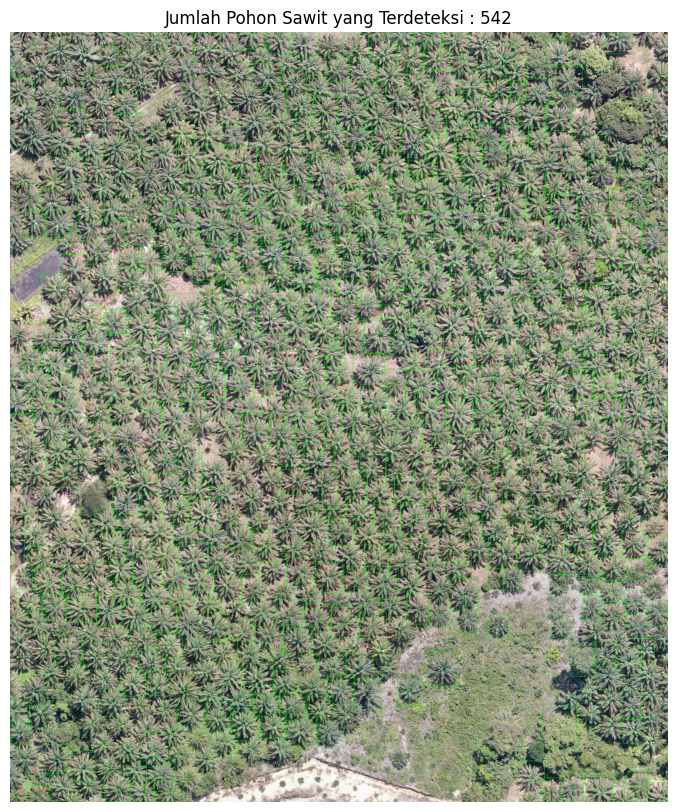

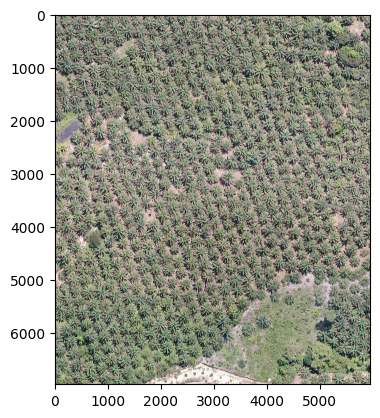

In [15]:
# Step 5: Count the Detected Palm Trees
palm_tree_count = len(palm_tree_boxes)
print(f"Jumlah pohon sawit yang terdeteksi : {palm_tree_count}")

# Step 6: Visualize the Results
# Draw bounding boxes on the image
for box in palm_tree_boxes:
    x1, y1, x2, y2 = map(int, box)
    cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis("off")
plt.title(f"Jumlah Pohon Sawit yang Terdeteksi : {palm_tree_count}")
plt.show()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [18]:
cv2.imwrite("newimage.jpg", image_rgb)

True

In [19]:
torch.backends.cudnn.version()

90100